In [419]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, make_scorer
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [420]:
data = pd.read_csv('data.csv')

In [421]:
data.set_index('OSEBuildingID', inplace = True)

In [422]:
data

,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,EnergyStarNaN,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age,PropertyGFAParking(%),PropertyGFABuilding(s)(%),SteamUse(%),Electricity(%),NaturalGas(%),PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,88434.0,60.0,0.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,249.98,2.83,89.0,0.000000,100.000000,27.730162,54.605993,17.663838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,11.0,103566.0,83880.0,61.0,0.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,295.86,2.86,20.0,14.545314,85.454686,0.000000,38.660907,61.339093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,41.0,956110.0,756493.0,43.0,0.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,2089.28,2.19,47.0,20.574829,79.425171,29.711308,68.230741,2.057944,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,10.0,61320.0,61320.0,56.0,0.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,286.43,4.67,90.0,0.000000,100.000000,32.591344,40.751928,26.656717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,18.0,175580.0,123445.0,75.0,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,505.01,2.88,36.0,35.311539,64.688461,0.000000,37.880168,62.119825,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,12294.0,46.0,0.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,20.94,1.70,26.0,0.000000,100.000000,0.000000,61.697384,38.302639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50223,1.0,1.0,16000.0,16000.0,0.0,1.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,32.17,2.01,12.0,0.000000,100.000000,0.000000,41.729558,58.270426,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50224,1.0,1.0,13157.0,7583.0,0.0,1.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,223.54,16.99,42.0,0.000000,100.000000,0.000000,31.082041,68.917956,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [423]:
data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [424]:
X = data[['Age','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','LargestPropertyUseTypeGFA','ENERGYSTARScore','EnergyStarNaN',
        'PrimaryPropertyType_Distribution Center', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility','CouncilDistrictCode_1',
       'CouncilDistrictCode_2', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_4', 'CouncilDistrictCode_5',
       'CouncilDistrictCode_6', 'CouncilDistrictCode_7']]


y = data['TotalGHGEmissions']

In [425]:
X.shape

(1648, 30)

In [426]:
y.head()

OSEBuildingID
1     249.98
2     295.86
3    2089.28
5     286.43
8     505.01
Name: TotalGHGEmissions, dtype: float64

In [427]:
cols = ['Age','PropertyGFATotal',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'LargestPropertyUseTypeGFA','ENERGYSTARScore', 'TotalGHGEmissions']

Age
0.29753360879193896


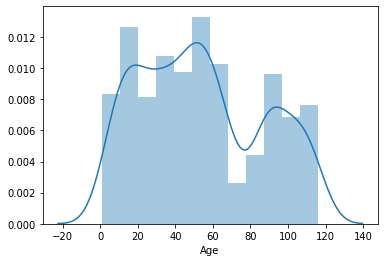

PropertyGFATotal
19.037917545145827


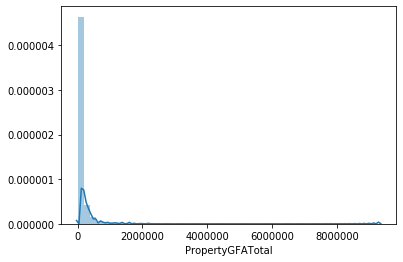

SiteEUI(kBtu/sf)
3.767000453173848


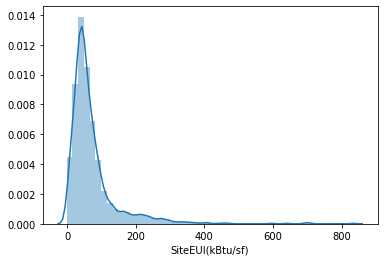

SiteEUIWN(kBtu/sf)
3.6664593768907086


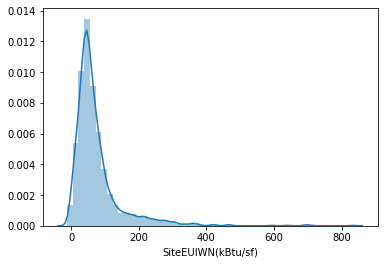

SourceEUI(kBtu/sf)
5.02139873400849


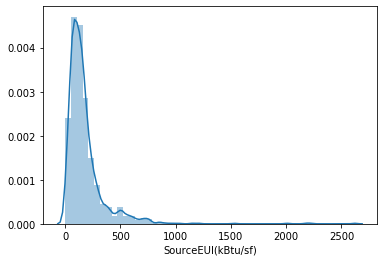

SourceEUIWN(kBtu/sf)
4.998804175082916


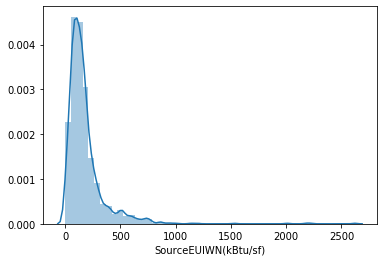

SiteEnergyUse(kBtu)
17.973308078803022


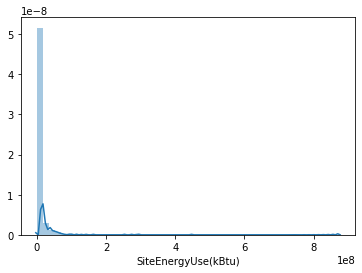

SiteEnergyUseWN(kBtu)
11.273463145790341


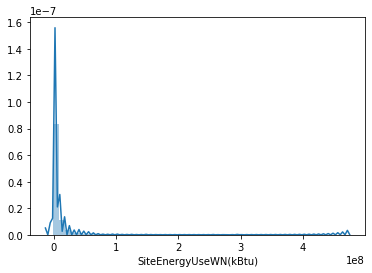

LargestPropertyUseTypeGFA
23.175161728669494


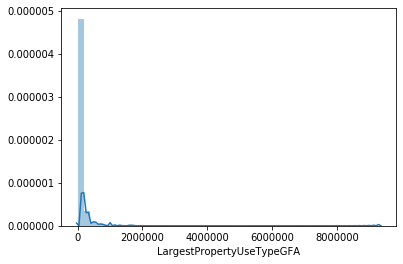

ENERGYSTARScore
0.07727154779048637


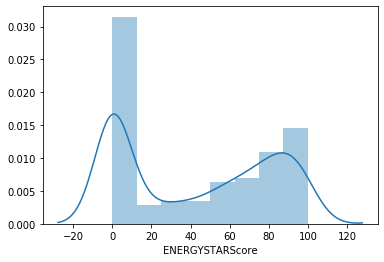

TotalGHGEmissions
14.130616835139792


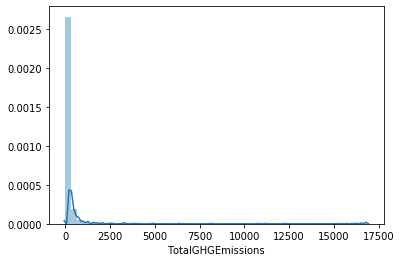

In [428]:
for col in cols:
      print(col)
      print(skew(data[col]))

      plt.figure()
      sns.distplot(data[col])
      plt.show()

12.267743014672009


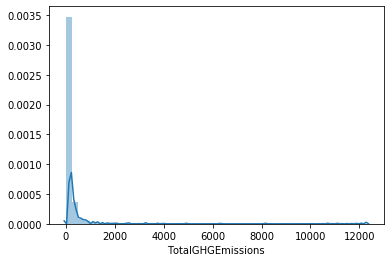

In [429]:
print(skew(y_train))
plt.figure()
sns.distplot(y_train)
plt.show()

In [430]:
cols = ['Age','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','PropertyGFATotal',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
        'LargestPropertyUseTypeGFA','ENERGYSTARScore', 'TotalGHGEmissions']

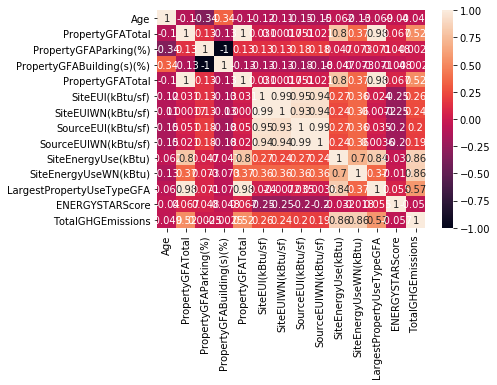

In [431]:
sns.heatmap(data[cols].corr(), annot = True)

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [433]:
colsk = ['Age','PropertyGFATotal', 'LargestPropertyUseTypeGFA','ENERGYSTARScore']
X_train_tt = X_train.copy()
X_test_tt = X_test.copy()
X_train_tt[colsk] = np.log1p(X_train_tt[colsk])
X_test_tt[colsk] = np.log1p(X_test_tt[colsk])

In [434]:
X_test_tt.isnull().sum()

Age                                                0
NumberofBuildings                                  0
NumberofFloors                                     0
PropertyGFATotal                                   0
PropertyGFAParking(%)                              0
PropertyGFABuilding(s)(%)                          0
LargestPropertyUseTypeGFA                          0
ENERGYSTARScore                                    0
EnergyStarNaN                                      0
PrimaryPropertyType_Distribution Center            0
PrimaryPropertyType_Hotel                          0
PrimaryPropertyType_K-12 School                    0
PrimaryPropertyType_Large Office                   0
PrimaryPropertyType_Medical Office                 0
PrimaryPropertyType_Mixed Use Property             0
PrimaryPropertyType_Other                          0
PrimaryPropertyType_Retail Store                   0
PrimaryPropertyType_Self-Storage Facility          0
PrimaryPropertyType_Small- and Mid-Sized Offic

In [435]:
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
X_train_tt = std_scale.transform(X_train_tt)
X_test_tt = std_scale.transform(X_test_tt)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_train_tt = pd.DataFrame(X_train_tt, columns = X.columns)
X_test_tt = pd.DataFrame(X_test_tt, columns = X.columns)

In [436]:
dr = DummyRegressor(strategy="mean")
dr.fit(X_train, y_train)
baseline_error = mean_squared_error(y_test, dr.predict(y_test), squared=False)
baseline_error

968.2106104387265

In [437]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_error = mean_squared_error(y_test, lr.predict(X_test), squared=False)
lr_error

849.9064979139018

In [438]:
n_alphas = 100
alphas = np.logspace(-1, 7, n_alphas)

ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, mean_squared_error(y_test, ridge.predict(X_test), squared=False)])

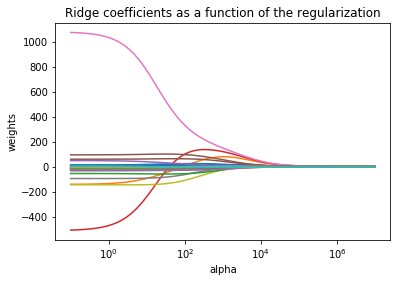

In [439]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

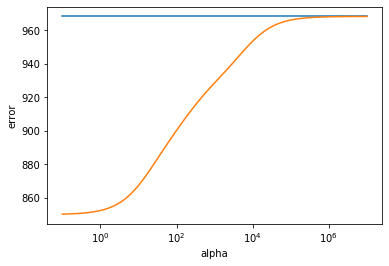

In [440]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [441]:
np.min(errors)

850.1438048488458

In [442]:
errors.index(min(errors))

0

In [443]:
errors[errors.index(min(errors))]

[968.2106104387265, 850.1438048488458]

In [444]:
alphas[errors.index(min(errors))]

0.1

In [445]:
ridge.set_params(alpha = alphas[errors.index(min(errors))])
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [446]:
mean_squared_error(y_test, ridge.predict(X_test), squared=False)

850.1438048488458

In [447]:
n_alphas = 100
alphas = np.logspace(-1, 4, n_alphas)
lasso = Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

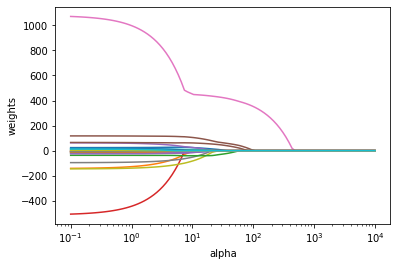

In [448]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

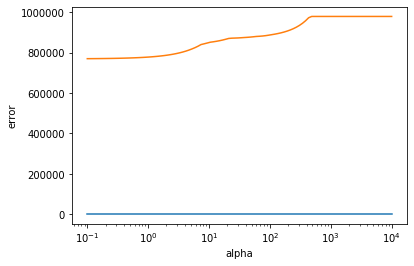

In [449]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [450]:
np.min(errors)

968.2106104387265

In [451]:
errors.index(min(errors))

0

In [452]:
alphas[errors.index(min(errors))]

0.1

In [453]:
lasso.set_params(alpha = alphas[errors.index(min(errors))])
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [454]:
mean_squared_error(y_test, lasso.predict(X_test), squared=False)

877.523691182049

In [455]:
def resultize(grid):

    res = pd.DataFrame(grid.cv_results_)
    res = res[['params', 'mean_test_RMSE', 'rank_test_RMSE', 'mean_test_MSE', 'rank_test_MSE', 'mean_test_MAE', 'rank_test_MAE', 'mean_test_R2', 'rank_test_R2']]
    res['mean_test_MSE'] = (-res[f'mean_test_MSE'])
    res['mean_test_RMSE'] = (-res[f'mean_test_RMSE'])
    res['mean_test_MAE'] = (-res[f'mean_test_MAE'])
    res.sort_values(by='rank_test_RMSE', inplace=True)
    return res

In [456]:
s = {'MSE': 'neg_mean_squared_error', 
      'RMSE': 'neg_root_mean_squared_error',
      'MAE': 'neg_mean_absolute_error',
      'R2': 'r2'}
score = 'RMSE'

In [457]:
params = {'alpha': np.logspace(0, 7, 20)}
grid_ridge = GridSearchCV(Ridge(), params, cv = 10, 
                  scoring = s, refit = score, n_jobs=-1)
grid_ridge.fit(X_train, y_train)
grid_ridge_best_params = grid_ridge.best_params_
resultize(grid_ridge).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
8,{'alpha': 885.8667904100823},475.502614,1,283330.241314,1,152.387597,1,0.319256,1
7,{'alpha': 379.26901907322497},499.449459,2,303322.091078,2,164.412205,3,0.287768,2
9,{'alpha': 2069.138081114788},508.441065,3,321902.221801,3,160.346760,2,0.278607,3
10,{'alpha': 4832.930238571752},548.095508,4,376555.481883,4,174.239427,4,0.198896,4
6,{'alpha': 162.3776739188721},558.383050,5,416808.241454,5,181.036959,5,0.165952,5


In [458]:
grid_rf_best_params = {'alpha': 885.8667904100823}	

In [459]:
rf = Ridge(**grid_rf_best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_error = mean_squared_error(y_test, y_pred, squared=False)
rf_error

927.2576474530254

In [460]:
params = {"alpha": np.logspace(-1, 3, 30)}
grid_lasso = GridSearchCV(Lasso(), params, cv = 10, 
                  scoring = s, refit = score, n_jobs=-1)
grid_lasso.fit(X_train, y_train)
grid_lasso_best_params = grid_lasso.best_params_
resultize(grid_lasso).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
21,{'alpha': 78.80462815669912},482.426558,1,287018.667921,1,156.079568,2,0.314691,1
22,{'alpha': 108.2636733874054},483.821142,2,290925.425738,2,159.498764,3,0.300916,3
20,{'alpha': 57.361525104486816},492.310747,3,295571.337810,3,156.072793,1,0.308447,2
23,{'alpha': 148.73521072935117},507.120903,4,317067.628852,4,165.838400,5,0.273989,4
19,{'alpha': 41.753189365604},538.126128,5,375256.313755,5,161.744613,4,0.238725,5


In [461]:
grid_lasso_best_params = {'alpha': 529.8316906283708}

In [462]:
lasso = Lasso(**grid_lasso_best_params)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_error = mean_squared_error(y_test, y_pred, squared=False)
lasso_error

968.2106104387265

In [463]:
grid_ridge = GridSearchCV(Ridge(), params, cv = 10, 
                  scoring = s, refit = score, n_jobs=-1)

In [464]:
tt_ridge = TransformedTargetRegressor(regressor = Ridge(),
                               func = np.log1p,
                               inverse_func = np.expm1)
tt_ridge.fit(X_train_tt, y_train)
y_pred = tt_ridge.predict(X_test)
tt_ridge_error = mean_squared_error(y_test, y_pred, squared=False)
tt_ridge_error

984.3727462405766

In [465]:
params = {'regressor__alpha': np.logspace(0, 7, 100)}
grid_tt_ridge = GridSearchCV(tt_ridge, scoring=s, refit = score, param_grid=params, cv = 10)
grid_tt_ridge.fit(X_train, y_train)
grid_tt_ridge_best_params = grid_tt_ridge.best_params_
resultize(grid_tt_ridge).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
51,{'regressor__alpha': 4037.017258596554},567.511958,1,398873.246062,1,146.215892,1,0.052489,1
52,{'regressor__alpha': 4750.810162102794},573.197078,2,405335.331704,2,147.740556,2,0.043605,2
53,{'regressor__alpha': 5590.810182512223},594.247751,3,433864.998985,3,150.931698,3,0.015224,3
54,{'regressor__alpha': 6579.3322465756755},606.987103,4,454950.337828,4,152.851582,4,-0.006245,4
55,{'regressor__alpha': 7742.63682681127},614.372123,5,468317.285025,5,154.134686,5,-0.020559,5


In [466]:
grid_tt_ridge_best_params = {'alpha': 4037.017258596554}

In [467]:
tt_ridge = TransformedTargetRegressor(regressor = Ridge(**grid_tt_ridge_best_params),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)
tt_ridge_error = mean_squared_error(y_test, y_pred, squared=False)
tt_ridge_error

975.9617424881096

In [468]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_error = mean_squared_error(y_test, y_pred, squared=False)
svr_error

977.6534948431871

In [469]:
params = {'kernel': ['sigmoid','rbf','poly'],
         'C': [0.1,1,100,1000],
         'degree': [1,2,3,4,5,6]}
grid_svr = GridSearchCV(SVR(), params, cv=10, scoring = s,
                        refit = score,  n_jobs=-1)
grid_svr.fit(X_train, y_train)
best_params_svr = grid_svr.best_params_
resultize(grid_svr).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
56,"{'C': 1000, 'degree': 1, 'kernel': 'poly'}",487.504017,1,298326.936244,1,121.197764,1,0.302931,7
64,"{'C': 1000, 'degree': 4, 'kernel': 'rbf'}",502.729907,2,335995.421409,3,124.688712,3,0.368132,1
67,"{'C': 1000, 'degree': 5, 'kernel': 'rbf'}",502.729907,2,335995.421409,3,124.688712,3,0.368132,1
61,"{'C': 1000, 'degree': 3, 'kernel': 'rbf'}",502.729907,2,335995.421409,3,124.688712,3,0.368132,1
58,"{'C': 1000, 'degree': 2, 'kernel': 'rbf'}",502.729907,2,335995.421409,3,124.688712,3,0.368132,1


In [470]:
best_params_svr = {'C': 1000, 'degree': 4, 'kernel': 'rbf'}

In [471]:
svr = SVR(**best_params_svr)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

918.8533032649599

In [475]:
tt = TransformedTargetRegressor(regressor = SVR(**best_params_svr),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train_tt, y_train)
y_pred = tt.predict(X_test_tt)
mean_squared_error(y_test, y_pred, squared=False)

61893.65683313666

In [476]:
tt = TransformedTargetRegressor(regressor = SVR(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__C': [0.1,1,100,1000],
            'regressor__degree': [1,2,3,4,5,6],
            'regressor__kernel': ['sigmoid','rbf','poly']}
grid = GridSearchCV(tt, cv = 10, scoring = s, refit = score, n_jobs=-1, param_grid=params)
grid.fit(X_train_tt, y_train)
best_params_svr_tt = grid.best_params_
resultize(grid).head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
tt = TransformedTargetRegressor(regressor = SVR(**best_params_svr_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [477]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

878.0048358189819

In [480]:
params = {'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [1,2,3,4,5,6,7,8,9,10],
            'min_samples_split': [2,3,4,5,6,7,8,9,10],
}
grid_rf = GridSearchCV(RandomForestRegressor(), params, cv=10, scoring = s, refit = score, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_params_rf = grid_rf.best_params_
resultize(grid_rf).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
370,"{'max_depth': 9, 'min_samples_split': 4, 'n_es...",389.782738,1,177584.548064,1,127.368119,1,0.535029,1
419,"{'max_depth': 10, 'min_samples_split': 4, 'n_e...",394.754736,2,180820.071994,2,127.712609,2,0.515759,12
372,"{'max_depth': 9, 'min_samples_split': 4, 'n_es...",395.115910,3,183169.504542,8,127.851473,3,0.527863,2
317,"{'max_depth': 8, 'min_samples_split': 2, 'n_es...",395.756284,4,183033.958833,6,127.932470,5,0.525910,4
413,"{'max_depth': 10, 'min_samples_split': 3, 'n_e...",395.914299,5,183148.620952,7,127.993785,6,0.519623,9


In [482]:
best_params_rf = {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 100}

In [489]:
rf = RandomForestRegressor(**best_params_rf)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

871.067851351641

In [491]:
tt = TransformedTargetRegressor(regressor = RandomForestRegressor(**best_params_rf),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt.fit(X_train_tt, y_train)
y_pred = tt.predict(X_test_tt)
mean_squared_error(y_test, y_pred, squared=False)

926.998740028455

In [496]:
tt_rf = TransformedTargetRegressor(regressor = RandomForestRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__n_estimators': [100, 200, 300, 400, 500],
            'regressor__max_depth': [1,2,3,4,5,6,7,8,9,10],
            'regressor__min_samples_split': [2,3,4,5,6,7,8,9,10]}
grid_tt_rf = GridSearchCV(tt_rf, params, cv = 10, scoring = s, refit = score, n_jobs=-1)
grid_tt_rf.fit(X_train_tt, y_train)
best_params_rf_tt = grid_tt_rf.best_params_
resultize(grid_tt_rf).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
320,"{'regressor__max_depth': 8, 'regressor__min_sa...",460.692025,1,261609.216151,1,119.784300,2,0.418534,1
417,"{'regressor__max_depth': 10, 'regressor__min_s...",469.792284,2,276245.263840,5,121.068744,16,0.408383,3
316,"{'regressor__max_depth': 8, 'regressor__min_sa...",469.835983,3,273492.436868,2,120.936403,11,0.405356,6
413,"{'regressor__max_depth': 10, 'regressor__min_s...",470.649466,4,278750.251170,6,120.369848,4,0.411759,2
271,"{'regressor__max_depth': 7, 'regressor__min_sa...",470.651603,5,275338.464234,3,122.111112,41,0.396915,19


In [498]:
best_params_rf_tt = {'max_depth': 8,
 'min_samples_split': 3,
 'n_estimators': 100}

In [499]:
best_params_rf_tt = {'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 200}
rf_tt = TransformedTargetRegressor(
      regressor = RandomForestRegressor(**best_params_rf_tt),
      func = np.log1p,
      inverse_func = np.expm1)
rf_tt.fit(X_train_tt, y_train)
y_pred = rf_tt.predict(X_test_tt)
mean_squared_error(y_test, y_pred, squared=False)

929.5797345307338

In [500]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

825.3071199981167

In [501]:
params = {'loss': ['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth': [4, 6],
            'min_samples_leaf': [3, 5, 9, 17],
}
grid_gb = GridSearchCV(GradientBoostingRegressor(), params, cv=10, scoring = s, refit = score, n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_params_gb = grid_gb.best_params_
resultize(grid_gb).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
0,"{'learning_rate': 0.1, 'loss': 'ls', 'max_dept...",358.629988,1,139464.125422,1,118.889967,9,0.419397,21
32,"{'learning_rate': 0.05, 'loss': 'ls', 'max_dep...",365.625682,2,144467.866513,2,121.384600,18,0.420592,20
16,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",368.288590,3,157009.439734,5,113.368069,1,0.540011,1
2,"{'learning_rate': 0.1, 'loss': 'ls', 'max_dept...",379.056951,4,155527.575728,4,134.134067,64,0.357391,41
6,"{'learning_rate': 0.1, 'loss': 'ls', 'max_dept...",379.590309,5,155286.893495,3,132.757320,58,0.331857,49


In [506]:
best_params_gb = {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'min_samples_leaf': 3}

In [507]:
gb = GradientBoostingRegressor(**best_params_gb)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

850.3176525790487

In [508]:
tt_gb = TransformedTargetRegressor(regressor = GradientBoostingRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__loss': ['ls', 'lad', 'huber', 'quantile'],
            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],
            'regressor__max_depth': [4, 6],
            'regressor__min_samples_leaf': [3, 5, 9, 17]}
grid = GridSearchCV(tt_gb, params, cv = 10, scoring = s, refit = score, n_jobs=-1)
grid.fit(X_train_tt, y_train)
best_params_gb_tt = grid.best_params_
resultize(grid).head()

,params,mean_test_RMSE,rank_test_RMSE,mean_test_MSE,rank_test_MSE,mean_test_MAE,rank_test_MAE,mean_test_R2,rank_test_R2
21,"{'regressor__learning_rate': 0.1, 'regressor__...",348.439551,1,145859.729492,5,105.856672,2,0.576086,3
28,"{'regressor__learning_rate': 0.1, 'regressor__...",350.756538,2,141270.432267,2,147.341948,97,0.575052,4
5,"{'regressor__learning_rate': 0.1, 'regressor__...",352.268470,3,146618.928615,6,105.063069,1,0.554623,8
30,"{'regressor__learning_rate': 0.1, 'regressor__...",352.759847,4,141990.443987,3,149.944045,99,0.459212,41
29,"{'regressor__learning_rate': 0.1, 'regressor__...",353.648541,5,140580.184578,1,149.350098,98,0.551575,10


In [ ]:
best_params_gb_tt = {'learning_rate': 0.1,
      'loss': 'ls',
      'max_depth': 6,
      'min_samples_leaf': 5
      }
gb_tt = TransformedTargetRegressor(regressor=GradientBoostingRegressor(**best_params_gb_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
gb_tt.fit(X_train, y_train)
y_pred = gb_tt.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
ad =  AdaBoostRegressor()
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
'''params = {'n_estimators': [100, 200, 300, 400, 500],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'loss': ['linear', 'square', 'exponential'],
}
grid = GridSearchCV(AdaBoostRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_ad = grid.best_params_
resultize(grid).head()'''

In [ ]:
best_params_ad = {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 400}

In [ ]:
ad = AdaBoostRegressor(**best_params_ad)
ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
"""tt_ad = TransformedTargetRegressor(regressor = AdaBoostRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__n_estimators': [100, 200, 300, 400, 500],
            'regressor__learning_rate': [0.1, 0.05, 0.02, 0.01],
            'regressor__loss': ['linear', 'square', 'exponential'],
}
grid = GridSearchCV(tt_ad, params, cv = 10)
grid.fit(X_train, y_train)
best_params_ad_tt = grid.best_params_
resultize(grid).head()"""

In [ ]:
best_params_ad_tt = {'learning_rate': 0.1,
      'loss': 'square',
      'n_estimators': 200
      }
tt_ad = TransformedTargetRegressor(regressor=AdaBoostRegressor(**best_params_ad_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_ad.fit(X_train, y_train)
y_pred = tt_ad.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
'''params = {'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
}
grid = GridSearchCV(MLPRegressor(), params, cv=10)
grid.fit(X_train, y_train)
best_params_mlp = grid.best_params_
resultize(grid).head()'''

In [ ]:
best_params_mlp = {'activation': 'logistic',
                  'hidden_layer_sizes': (200,), 
                  'solver': 'lbfgs'}

In [ ]:
mlp = MLPRegressor(**best_params_mlp)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
"""tt_mlp = TransformedTargetRegressor(regressor = MLPRegressor(),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
params = {'regressor__hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,)],
            'regressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'regressor__solver': ['lbfgs', 'adam'],
}
grid = GridSearchCV(tt_mlp, params, cv = 10)
grid.fit(X_train, y_train)
best_params_mlp_tt = grid.best_params_
resultize(grid).head()"""

In [ ]:
best_params_mlp_tt = {'activation': 'tanh',
      'hidden_layer_sizes': (100,),
      'solver': 'adam'
      }
tt_mlp = TransformedTargetRegressor(regressor=MLPRegressor(**best_params_mlp_tt),
                                    func = np.log1p,
                                    inverse_func = np.expm1)
tt_mlp.fit(X_train, y_train)
y_pred = tt_mlp.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)